# WINE QUALITY ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv('C:\M2CML22\Practicas\Practicas03y04\Files\product_quality.csv', sep = ';')
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
def data_preprocesing(data):
    data.columns = data.columns.str.title()
    data_scalered = pd.DataFrame(StandardScaler().fit_transform(data),columns = data.columns)
    display(data_scalered.head(3))
    global X, Y
    X, Y = data_scalered.drop(columns = 'Quality').values, data['Quality']

In [ ]:
data_preprocesing(data)

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,Ph,Sulphates,Alcohol,Quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823


## 1. EXPLORE AND ANALISYS DATA

In [ ]:
def explore_and_analisys_data(data):
    data_describe = data.describe(include = 'all')
    data_describe.loc['null'] = data.isnull().sum()
    data_describe.loc['duplicate'] = len(data[data.duplicated()])
    data_describe.loc['dtype'] = data.dtypes
    display(data_describe)

In [ ]:
explore_and_analisys_data(data)

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,Ph,Sulphates,Alcohol,Quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.17906,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3.0
25%,7.1,0.39,0.09,1.9,0.07,7.0,22.0,0.9956,3.21,0.55,9.5,5.0
50%,7.9,0.52,0.26,2.2,0.079,14.0,38.0,0.99675,3.31,0.62,10.2,6.0
75%,9.2,0.64,0.42,2.6,0.09,21.0,62.0,0.997835,3.4,0.73,11.1,6.0
max,15.9,1.58,1.0,15.5,0.611,72.0,289.0,1.00369,4.01,2.0,14.9,8.0
null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
duplicate,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0


In [ ]:
def label_distribution(data):
    fig, ax = plt.subplots(2, 1, figsize = (10,9), sharex=True)
    bin_edges = np.arange(0,12,1)
    freq, _ = np.histogram(data['Quality'], bins=bin_edges)

    ax[0].boxplot(data['Quality'], vert=False)
    ax[0].set_xticks(bin_edges)

    ax[1].bar(bin_edges[:-1], freq, color = 'crimson')
    ax[1].axvline(data['Quality'].mean(), color='black', linestyle='dashed', linewidth=2)
    ax[1].axvline(data['Quality'].median(), color='black', linestyle='dotted', linewidth=2)
    ax[1].set_xticks(bin_edges[:-1])
    ax[1].set_xticklabels(bin_edges[:-1])

    return plt.show()

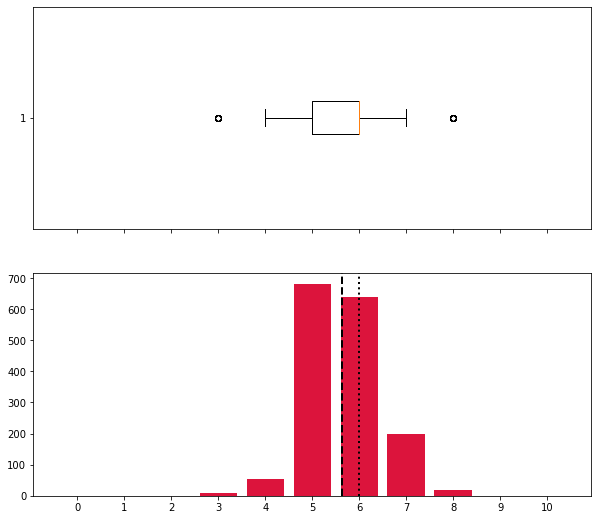

In [ ]:
label_distribution(data)

In [ ]:
def features_distribution(data):
    warnings.filterwarnings("ignore") # ignore it is a deprecated function and there is also a new one better

    fig = plt.figure(figsize = [20, 10])
    cols = data.columns
    contador = 1
    for col in cols:
        plt.subplot(4, 3, contador)
        sns.distplot(data[col], hist_kws = dict(edgecolor = 'k', linewidth = 1, color = 'crimson'), color = 'red')
        contador += 1

    plt.tight_layout()
    return plt.show()

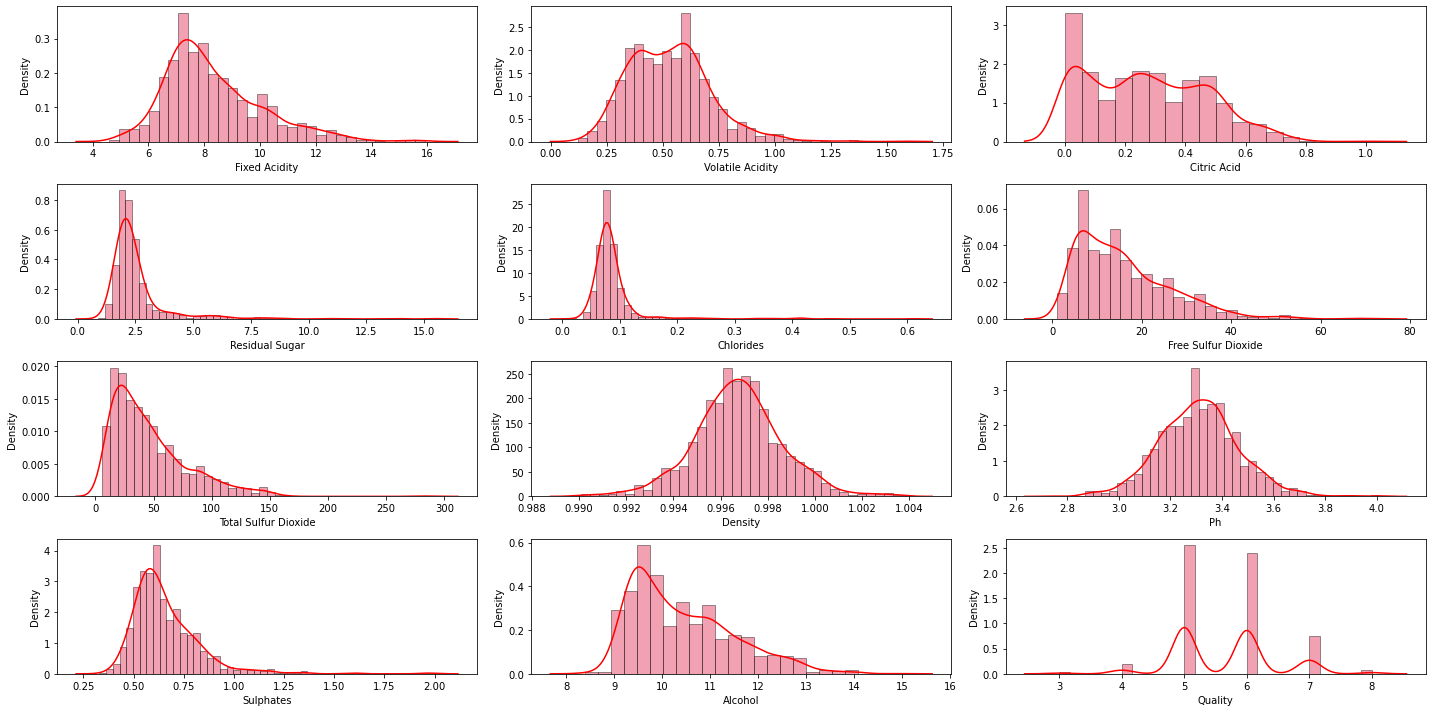

In [ ]:
features_distribution(data)

## 2. EXPLORE RELATIONSHIPS BETWEEN FEATURES AND LABEL

In [ ]:
def matrix_and_relevant_relationships(df, threshold):
    gradient = np.linspace(-1, 1)
    gradient = np.vstack((gradient, gradient))
    my_cmap = sns.diverging_palette(9, 9, s = 100, l = 33, sep = 30, n = 100, center = 'light', as_cmap = True)
    fig, ax = plt.subplots(1, figsize=(20, 1))
    ax.imshow(gradient, aspect='auto', cmap = my_cmap)
    ax.set_axis_off()
    plt.show()

    correlation_matrix = df.corr(method = 'pearson')
    display(correlation_matrix.style.background_gradient(axis = None, cmap = my_cmap))
    
    condition = (abs(correlation_matrix) > threshold) & (correlation_matrix != 1)
    upper_matrix_condition = np.triu((np.ones(correlation_matrix.shape)).astype(bool))

    relationships = correlation_matrix[upper_matrix_condition & condition]
    relationships = relationships.stack().reset_index()
    relationships.columns = ['feature_1', 'feature_2', 'correlation']
    relationships = relationships.reindex(relationships.correlation.abs().sort_values(ascending = False).index).reset_index(drop = True)
    return relationships

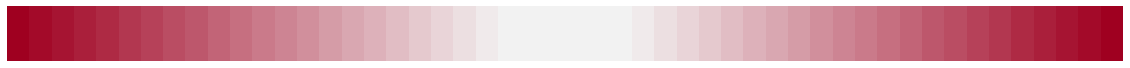

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,Ph,Sulphates,Alcohol,Quality
Fixed Acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Volatile Acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Citric Acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Residual Sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Free Sulfur Dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Total Sulfur Dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Ph,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


,feature_1,feature_2,correlation
0,Fixed Acidity,Ph,-0.682978
1,Fixed Acidity,Citric Acid,0.671703
2,Fixed Acidity,Density,0.668047
3,Free Sulfur Dioxide,Total Sulfur Dioxide,0.667666
4,Volatile Acidity,Citric Acid,-0.552496
5,Citric Acid,Ph,-0.541904
6,Density,Alcohol,-0.496180
7,Alcohol,Quality,0.476166


In [ ]:
matrix_and_relevant_relationships(data, 0.4)

## 4. SELECTOR AND PREDICTOR CLASSIFIER OR REGRESSOR

In [ ]:
# =============================================================================
# Classifiers
# =============================================================================
RF_C = RandomForestClassifier(n_estimators = 100, random_state = 0)
LogReg = LogisticRegression()
SVC = SVC()
LDA = LinearDiscriminantAnalysis()
KNN_C = KNeighborsClassifier(n_neighbors = 1)

# =============================================================================
# Regressors
# =============================================================================
GBR = GradientBoostingRegressor(n_estimators = 100, random_state = 0)
LinReg = LinearRegression()
KNN_R = KNeighborsRegressor(n_neighbors = 1)
XGB_R = XGBRegressor()
RF_R = RandomForestRegressor(n_estimators = 100, random_state = 0)

# =============================================================================
# Feature Selectors: Extractors
# =============================================================================
pca = PCA(n_components = 5)
lda = LinearDiscriminantAnalysis()

# =============================================================================
# Feature Selectors: Wrapped methods
# =============================================================================
sel_model = SelectFromModel(RF_C)
sfs = SequentialFeatureSelector(LogReg, n_features_to_select = 4)

In [ ]:
def selector_and_predictor(X, Y, model, model_selector, n_splits = 10):
    import time
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
    
    start = time.process_time()
    classes = np.unique(Y)
    kf = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
    kappa = []
    accuracy = []
    cm = []
    for train_index, test_index in kf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        model_selector.fit(X_train, Y_train)
        X_train_reduced = model_selector.transform(X_train)
        X_test_reduced = model_selector.transform(X_test)
        
        model.fit(X_train_reduced, Y_train)
        Y_pred = model.predict(X_test_reduced)
        Y_pred_round = np.round(Y_pred)
        kappa.append( cohen_kappa_score(Y_test, Y_pred_round))
        accuracy.append(accuracy_score(Y_test, Y_pred_round))
        cm.append(confusion_matrix(Y_test, Y_pred_round, labels = classes))
    cm = np.array(cm)
    print('Tiempo transcurrido = ', time.process_time() - start, ' segundos')
    print('kappa = ', np.mean(kappa).round(2), u"\u00B1", np.std(kappa).round(2))
    print('accuracy = ', np.mean(accuracy).round(2), u"\u00B1", np.std(accuracy).round(2))
    disp = ConfusionMatrixDisplay(confusion_matrix = np.mean(cm, axis=0).round(2), display_labels = classes)
    disp.plot(cmap = 'Reds')
    plt.show()

## 5. CLASSIFICATION MODELS

### RANDOM FOREST CLASSIFIER

Tiempo transcurrido =  5.3125  segundos
kappa =  0.5 ± 0.05
accuracy =  0.69 ± 0.03


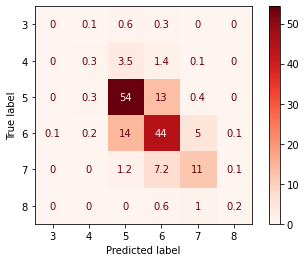

In [ ]:
selector_and_predictor(X, Y, RF_C, sel_model, n_splits=10)

### LOGISTIC REGRESSION CLASSIFIER

Tiempo transcurrido =  1.984375  segundos
kappa =  0.34 ± 0.04
accuracy =  0.6 ± 0.02


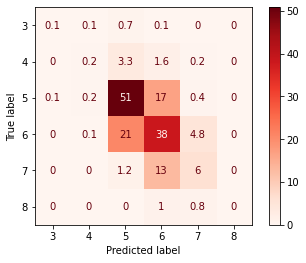

In [ ]:
selector_and_predictor(X, Y, LogReg, lda, n_splits=10)

### SUPPORT VECTOR CLASSIFIER

Tiempo transcurrido =  3.734375  segundos
kappa =  0.35 ± 0.06
accuracy =  0.61 ± 0.03


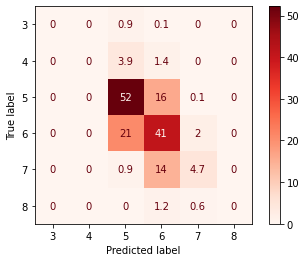

In [ ]:
selector_and_predictor(X, Y, SVC, sel_model, n_splits=10)

### LINEAR DISCRIMINANT ANALYSIS CLASSIFIER

Tiempo transcurrido =  8.546875  segundos
kappa =  0.34 ± 0.04
accuracy =  0.6 ± 0.03


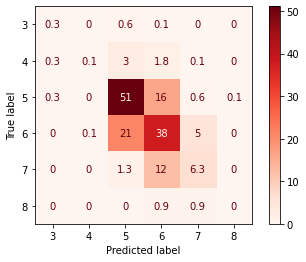

In [ ]:
selector_and_predictor(X, Y, LDA, sel_model, n_splits=10)

### K-NEIGHBORS CLASSIFIER

Tiempo transcurrido =  0.34375  segundos
kappa =  0.46 ± 0.04
accuracy =  0.65 ± 0.03


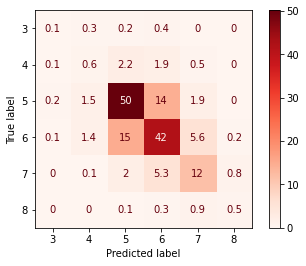

In [ ]:
selector_and_predictor(X, Y, KNN_C, pca, n_splits=10)

## 6. REGRESSION MODELS

### GRADIENT BOOSTING REGRESSOR

Tiempo transcurrido =  7.140625  segundos
kappa =  0.37 ± 0.05
accuracy =  0.62 ± 0.03


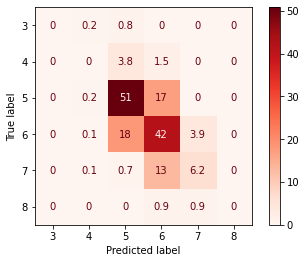

In [ ]:
selector_and_predictor(X, Y, GBR, lda, n_splits=10)

### LINEAR REGRESSOR

Tiempo transcurrido =  0.1875  segundos
kappa =  0.33 ± 0.05
accuracy =  0.59 ± 0.03


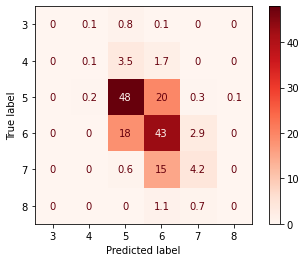

In [ ]:
selector_and_predictor(X, Y, LinReg, lda, n_splits=10)

### K-NEIGHBORS REGRESSOR

Tiempo transcurrido =  0.3125  segundos
kappa =  0.46 ± 0.04
accuracy =  0.65 ± 0.03


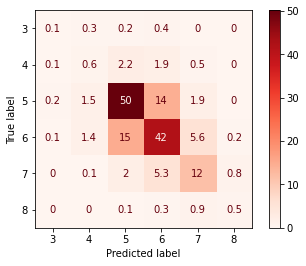

In [ ]:
selector_and_predictor(X, Y, KNN_R, pca, n_splits=10)

### XG BOOST REGRESSOR

Tiempo transcurrido =  11.0  segundos
kappa =  0.48 ± 0.04
accuracy =  0.68 ± 0.02


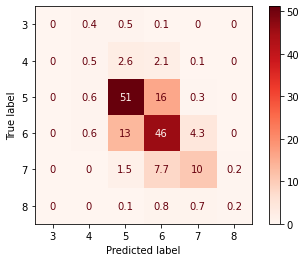

In [ ]:
selector_and_predictor(X, Y, XGB_R, pca, n_splits=10)

### RANDOM FOREST REGRESSOR

Tiempo transcurrido =  9.703125  segundos
kappa =  0.5 ± 0.04
accuracy =  0.7 ± 0.02


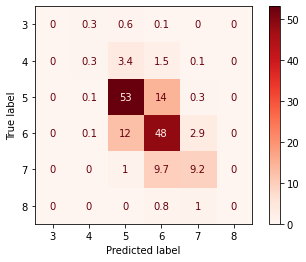

In [ ]:
selector_and_predictor(X, Y, RF_R, pca, n_splits=10)